In [35]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np

In [36]:
train_path = "dataset/train" 
class_1_path = os.path.join(train_path, "1")

In [37]:
import os, random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

train_dir = "dataset/train"

weak_classes = ["100", "20", "200", "50","1"]
target = 330

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.2,
    brightness_range=(0.7, 1.2),
    shear_range=0.1,
    fill_mode='nearest'
)

for cls in weak_classes:
    folder = os.path.join(train_dir, cls)
    imgs = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg','.png','.jpeg'))]

    count = len(imgs)
    print(f"[{cls}] Found {count} images")

    while count < target:
        name = random.choice(imgs)
        img = load_img(os.path.join(folder, name))
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        for _ in datagen.flow(
            x, batch_size=1, save_to_dir=folder,
            save_prefix=f"aug_{cls}", save_format='jpg'
        ):
            count += 1
            if count >= target:
                break

    print(f"[{cls}] Done → Final count: {count}")


[100] Found 330 images
[100] Done → Final count: 330
[20] Found 330 images
[20] Done → Final count: 330
[200] Found 330 images
[200] Done → Final count: 330
[50] Found 330 images
[50] Done → Final count: 330
[1] Found 330 images
[1] Done → Final count: 330


In [38]:
import os
import pandas as pd

train_path = "dataset/train"

class_counts = {}
total = 0

for class_name in os.listdir(train_path):
    class_folder = os.path.join(train_path, class_name)
    if os.path.isdir(class_folder):
        count = len(os.listdir(class_folder))
        class_counts[class_name] = count
        total += count

df = pd.DataFrame({
    "Class": list(class_counts.keys()),
    "Images": list(class_counts.values())
})

df["Percentage"] = (df["Images"] / total * 100).round(2)

print(df)
print("\nTotal images:", total)


      Class  Images  Percentage
0         1     330       11.14
1        10     315       10.63
2  10 (new)     317       10.70
3       100     330       11.14
4        20     330       11.14
5  20 (new)     346       11.68
6       200     330       11.14
7         5     334       11.28
8        50     330       11.14

Total images: 2962


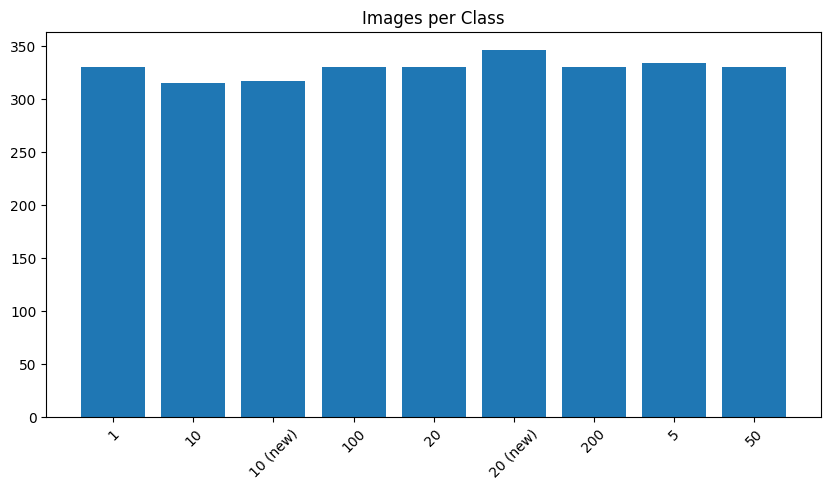

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(df["Class"], df["Images"])
plt.xticks(rotation=45)
plt.title("Images per Class")
plt.show()


In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)   
BATCH = 32

train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.2,
    brightness_range=(0.7,1.2),
    shear_range=0.1,
)

valid_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen  = ImageDataGenerator(rescale=1/255.0)

train_data = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='categorical'
)

valid_data = valid_datagen.flow_from_directory(
    "dataset/valid",
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    "dataset/test",
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='categorical',
    shuffle=False
)


Found 2962 images belonging to 9 classes.
Found 760 images belonging to 9 classes.
Found 290 images belonging to 9 classes.
